# CUDA exercises

In [56]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline

from IPython.display import display

In [4]:
HEADER = ["tests_done", "N", "total_time", "average_time", "max_runtime", "min_runtime"]
HEADER2 = ["grid_sizes", "block_size"] + HEADER
def csv_parse(path, header=False):
    if header:
        df = pd.read_csv(path, sep=";", names=header)
    else:
        df = pd.read_csv(path, sep=";")
    #display(df.head())
    return df



# Ex3.1 Sums

In [41]:
def calcGB_Stride(df):
    return 3*8* df["N"]/df["k"] /1e9

def calcGB_Offset(df):
    return 3*8* (df["N"]-df["k"])/1e9


In [50]:
df1 = csv_parse("data_offset.csv", header=False)
df2 = csv_parse("data_stride.csv", header=False)
df1["GB"] = calcGB_Offset(df1)
df1["bandwidth"] = df1["GB"]/df1["time"]
df2["GB"] = calcGB_Stride(df2)
df2["bandwidth"] = df2["GB"]/df2["time"]

display(df1)
display(df2)

k      time          N  Grid Size  Block Size        GB   bandwidth
0    0  0.019750  100000000        256         256  2.400000  121.518987
1    1  0.012775  100000000        256         256  2.400000  187.866926
2    2  0.012796  100000000        256         256  2.400000  187.558608
3    3  0.012696  100000000        256         256  2.400000  189.035911
4    4  0.013364  100000000        256         256  2.400000  179.586943
..  ..       ...        ...        ...         ...       ...         ...
59  59  0.013405  100000000        256         256  2.399999  179.037567
60  60  0.013327  100000000        256         256  2.399999  180.085433
61  61  0.012960  100000000        256         256  2.399999  185.185072
62  62  0.013022  100000000        256         256  2.399999  184.303372
63  63  0.012938  100000000        256         256  2.399998  185.499960

[64 rows x 7 columns]

k      time          N  Grid Size  Block Size        GB   bandwidth
0    0  0.162277  100000000        256         256       inf         inf
1    1  0.010157  100000000        256         256  2.400000  236.290243
2    2  0.013737  100000000        256         256  1.200000   87.355318
3    3  0.014233  100000000        256         256  0.800000   56.207405
4    4  0.013653  100000000        256         256  0.600000   43.946385
..  ..       ...        ...        ...         ...       ...         ...
59  59  0.003083  100000000        256         256  0.040678   13.194280
60  60  0.002995  100000000        256         256  0.040000   13.355593
61  61  0.002886  100000000        256         256  0.039344   13.632801
62  62  0.002822  100000000        256         256  0.038710   13.717108
63  63  0.002727  100000000        256         256  0.038095   13.969651

[64 rows x 7 columns]

In [51]:
#logx, logy = True, True
logx, logy = False, False
labels = ["Offset", "Stride"]

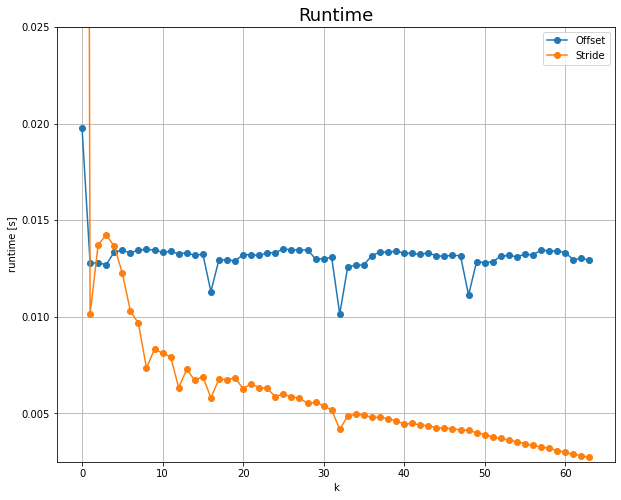

In [60]:
fig,ax  = plt.subplots(figsize=(10,8));

df1.plot(x="k", y="time", ax=ax, logx=logx, logy=logy, marker="o");
df2.plot(x="k", y="time", ax=ax, logx=logx, logy=logy, marker="o");
ax.set_title("Runtime", fontsize=18);
ax.set_ylabel("runtime [s]");
ax.set_ylim(0.0025, 0.025)
ax.legend(labels);
ax.grid();
fig.savefig("runtime.pdf")

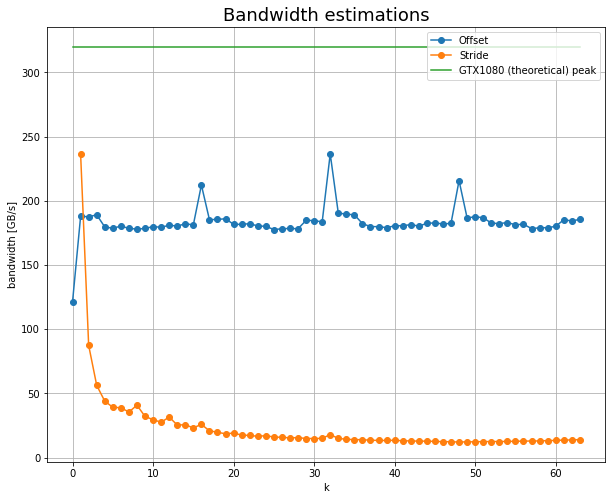

In [58]:
fig,ax  = plt.subplots(figsize=(10,8));
df1.plot(x="k", y="bandwidth", ax=ax, logx=logx, logy=logy, marker="o");
df2.plot(x="k", y="bandwidth", ax=ax, logx=logx, logy=logy, marker="o");
plt.plot([i for i in range(64)], [320]*64)
ax.set_title("Bandwidth estimations", fontsize=18);
ax.set_ylabel("bandwidth [GB/s]");
rcParams["legend.loc"] = 'upper right'
ax.legend(labels+["GTX1080 (theoretical) peak"]);
ax.grid();
fig.savefig("bandwidth.png")